In [1]:
import csv
import numpy as np
from spectra import Spectra, Pigment
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from observer import Observer, Cone
from inks import Neugebauer, InkGamut, find_best_ns, CellNeugebauer

In [3]:
import colour
colour_d50 = colour.SDS_ILLUMINANTS.get('D50')
d50 = Spectra(data=colour_d50.values / 103.003, wavelengths=colour_d50.wavelengths)

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)
trichromat = Observer.trichromat(illuminant=d50)
tetrachromat = Observer.tetrachromat(illuminant=d50)

In [36]:
import colour
colour_d65 = colour.SDS_ILLUMINANTS.get('D65')
d65 = Spectra(data=colour_d65.values / np.max(colour_d65.values), wavelengths=colour_d65.wavelengths)

## Loading cell n data

In [5]:
cijk = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "CIJK": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        cijk[name] = spectra

In [6]:
cijk_primaries = {}
cijk_samples = {}

for weight, spectra in cijk.items():
    if '1' in weight:
        key = tuple(int(char) / 2 for char in weight) 
        cijk_samples[key] = spectra
    else:
        key = weight.replace('2', '1')
        cijk_primaries[key] = spectra

In [7]:
mets = {}
with open(f'010624.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Mets": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [8]:
len(cijk_primaries)

16

In [9]:
len(cijk_samples)

65

In [10]:
for weight, spectra in mets.items():
    key = tuple(int(char) / 100 for char in weight.split(" "))
    print(key)
    cijk_samples[key] = spectra

(0.05, 0.0, 0.6, 0.75)
(0.5, 1.0, 0.3, 0.0)
(0.25, 1.0, 0.0, 0.1)
(0.0, 0.05, 0.65, 0.9)
(0.0, 0.1, 0.5, 0.8)
(0.2, 0.8, 0.0, 0.4)


In [11]:
len(cijk_samples)

71

In [12]:
best_ns = find_best_ns(cijk_primaries, cijk_samples)

In [13]:
best_ns[0]

array([ 0.77426368,  1.29154967,  1.29154967,  1.29154967,  1.29154967,
        1.29154967,  1.29154967,  0.77426368,  0.77426368,  0.46415888,
        0.46415888,  0.27825594,  0.27825594,  0.27825594,  0.27825594,
        0.27825594,  0.27825594,  0.16681005,  0.16681005,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.1       ,  0.1       ,  0.1       ,
        0.1       ])

In [14]:
best_ns[5]

array([ 0.77426368,  0.46415888,  0.27825594,  0.27825594,  0.16681005,
        0.16681005,  0.1       ,  0.1       ,  0.1       ,  0.16681005,
        0.16681005,  0.27825594,  0.46415888,  0.46415888,  0.77426368,
        1.29154967,  1.29154967,  2.15443469,  2.15443469,  3.59381366,
        3.59381366,  3.59381366,  3.59381366,  3.59381366,  2.15443469,
        2.15443469,  2.15443469,  2.15443469,  2.15443469,  1.29154967,
        1.29154967])

In [15]:
len(best_ns)

71

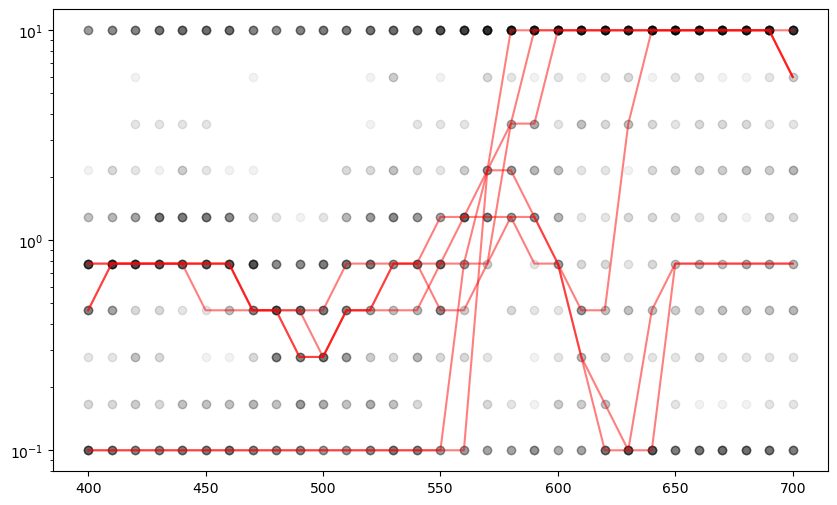

In [16]:
plt.figure(figsize=(10, 6))

for data in best_ns:
    plt.plot(wavelengths10, data, 'o', color='black', alpha=0.05)  # 'o' marker for dots

for data in best_ns[-6:]:
    plt.plot(wavelengths10, data,  color='red', alpha=0.5)  # 'o' marker for dots

plt.yscale('log')
plt.show()

In [17]:
mets = {}
with open(f'011024.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue
        if row[2] != "Candidates": continue
            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)

        mets[name] = spectra

In [18]:
mets

{'00 00 65 100': <spectra.Spectra at 0x2a69f7510>,
 '00 05 55 95': <spectra.Spectra at 0x29072a010>,
 '00 00 60 80': <spectra.Spectra at 0x2a6c00e50>,
 '00 10 55 80': <spectra.Spectra at 0x2a69f7690>,
 '00 10 60 75': <spectra.Spectra at 0x2a6b4e0d0>,
 '05 10 55 90': <spectra.Spectra at 0x2a69f5ad0>,
 '00 00 60 90': <spectra.Spectra at 0x2a6a000d0>,
 '25 100 00 50': <spectra.Spectra at 0x2a69f7710>,
 '20 95 00 45': <spectra.Spectra at 0x2a6a00090>,
 '25 85 00 25': <spectra.Spectra at 0x2a69f7750>,
 '20 90 00 15': <spectra.Spectra at 0x2a6a00350>,
 '20 90 05 00': <spectra.Spectra at 0x2a69f77d0>,
 '25 90 00 50': <spectra.Spectra at 0x2a6a00490>,
 '20 90 05 45': <spectra.Spectra at 0x2a69f54d0>,
 '20 20 60 100': <spectra.Spectra at 0x2a6f14d50>,
 '40 100 00 70': <spectra.Spectra at 0x2a69f78d0>,
 '00 00 50 70': <spectra.Spectra at 0x2a69f7c90>,
 '20 70 00 30': <spectra.Spectra at 0x2a69f7950>,
 '10 10 50 100': <spectra.Spectra at 0x2a6a03890>,
 '20 90 00 80': <spectra.Spectra at 0x2a69f79

In [19]:
len(cijk)

81

In [52]:
cijk_neug = CellNeugebauer(cijk)
cijk_gamut = InkGamut(cijk_neug, illuminant=d65)

In [53]:
def compare_spectra(spectra1: Spectra, spectra2: Spectra):
    return np.sum((spectra1.data() - spectra2.data()) ** 2)

In [63]:
def get_adjust(gamut:InkGamut, percentages, target_spectra):
    point = np.array(percentages)
    delta = 0.2
    ranges = [np.arange(p - delta, p + delta + 0.01, 0.05) for p in point]

    mesh = np.meshgrid(*ranges)
    best_score = 100
    best_adjust = None
    
    for values in zip(*[m.flatten() for m in mesh]):
        values = np.array(values)
        if any(values < 0) or any(values > 1): continue
        sample_spectra = gamut.get_spectra(values)

        score = compare_spectra(target_spectra, sample_spectra)
        if score < best_score:
            best_score = score
            best_adjust = values
            
            
#     print(best_adjust)
    return best_adjust - point, best_score

In [69]:
# loop thru mets
# determine
# 1. whether it is peach or violet dominant 
# 2. which n value is best (global, fixed n)
# 3. what the avg adjustment is


best_ns_violet = []
best_ns_peach = []
adjustments_violet = []
adjustments_peach = []

for p, s in mets.items():
    percentage = np.array([int(c) / 100 for c in p.split(" ")])
    
    best_n = None
    best_score = 100
    for n in np.logspace(-2, 3, num=9, base=10):
        neug_n = CellNeugebauer(cijk, n=n)
        result = neug_n.mix(percentage).reshape(-1)
        score = np.sum(np.square(result - s.data()))
        if score < best_score:
            best_n = n
        
    a = get_adjust(cijk_gamut, percentage, s)
            
    if percentage[1] > percentage[3]:
        # peach heavy
        best_ns_peach.append(best_n)
        adjustments_peach.append(a[0])
    else:
        best_ns_violet.append(best_n)
        adjustments_violet.append(a[0])

In [73]:
np.mean(adjustments_peach,axis=0)

array([ 0.0025, -0.1425,  0.0025, -0.1175])

In [74]:
np.mean(adjustments_violet,axis=0)

array([ 0.045, -0.035, -0.09 , -0.17 ])

In [75]:
cijk_primaries


{'0000': <spectra.Spectra at 0x1745e5fd0>,
 '0001': <spectra.Spectra at 0x2a69e6710>,
 '0010': <spectra.Spectra at 0x2a69e6850>,
 '0011': <spectra.Spectra at 0x2a69e6910>,
 '1000': <spectra.Spectra at 0x2a69e6b90>,
 '1001': <spectra.Spectra at 0x2a69e6c10>,
 '1010': <spectra.Spectra at 0x2a69e6d10>,
 '1011': <spectra.Spectra at 0x2a69e6d90>,
 '0100': <spectra.Spectra at 0x2a69f41d0>,
 '0101': <spectra.Spectra at 0x2a69f42d0>,
 '0110': <spectra.Spectra at 0x2a69f4510>,
 '0111': <spectra.Spectra at 0x2a69f4610>,
 '1100': <spectra.Spectra at 0x2a69f4b10>,
 '1101': <spectra.Spectra at 0x2a69f4c90>,
 '1110': <spectra.Spectra at 0x2a69f4e10>,
 '1111': <spectra.Spectra at 0x2a69f4f10>}

In [77]:
noncell_gamut = InkGamut(Neugebauer(cijk_primaries), illuminant=d65)

In [78]:
lst = []
for p, s in mets.items():
    percentage = np.array([int(c) / 100 for c in p.split(" ")])
    s1 = cijk_gamut.get_spectra(percentage)
    s2 = noncell_gamut.get_spectra(percentage)
    
    if compare_spectra(s, s1) > compare_spectra(s,s2):
        print(percentage)
        lst.append((s, s1, s2))
        

[ 0.3  1.   0.2  0.3]


In [83]:
compare_spectra(lst[0][0], lst[0][1])

0.091249588005637983

In [84]:
compare_spectra(lst[0][0], lst[0][2])

0.073614287842247508

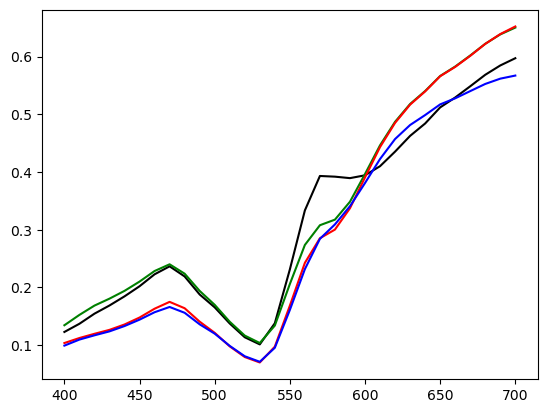

In [89]:
lst[0][0].plot(color='black')
cijk_gamut.get_spectra(+np.array([ 0.0025, -0.1425,  0.0025, -0.1175]) + np.array((0.3, 1, 0.2, 0.3))).plot(color="green")
lst[0][1].plot(color='red')  # cell neug 
lst[0][2].plot(color='blue')